## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.96245 | train_mse: 1.00541 | train_mae: 0.78151 |  0:00:01s


epoch 1  | loss: 0.35901 | train_mse: 0.23931 | train_mae: 0.38931 |  0:00:03s


epoch 2  | loss: 0.24586 | train_mse: 0.15574 | train_mae: 0.30432 |  0:00:04s


epoch 3  | loss: 0.20311 | train_mse: 0.1522  | train_mae: 0.30815 |  0:00:05s


epoch 4  | loss: 0.16816 | train_mse: 0.14301 | train_mae: 0.28687 |  0:00:07s


epoch 5  | loss: 0.13098 | train_mse: 0.12256 | train_mae: 0.26945 |  0:00:08s


epoch 6  | loss: 0.133   | train_mse: 0.09565 | train_mae: 0.22227 |  0:00:11s


epoch 7  | loss: 0.11513 | train_mse: 0.08766 | train_mae: 0.21692 |  0:00:13s


epoch 8  | loss: 0.09923 | train_mse: 0.06459 | train_mae: 0.20642 |  0:00:13s


epoch 9  | loss: 0.08472 | train_mse: 0.04044 | train_mae: 0.15798 |  0:00:14s


epoch 10 | loss: 0.07786 | train_mse: 0.03859 | train_mae: 0.155   |  0:00:15s


epoch 11 | loss: 0.08201 | train_mse: 0.03879 | train_mae: 0.15785 |  0:00:16s


epoch 12 | loss: 0.09118 | train_mse: 0.04371 | train_mae: 0.16879 |  0:00:17s


epoch 13 | loss: 0.06771 | train_mse: 0.03788 | train_mae: 0.15565 |  0:00:18s


epoch 14 | loss: 0.07944 | train_mse: 0.0258  | train_mae: 0.1245  |  0:00:19s


epoch 15 | loss: 0.05043 | train_mse: 0.03403 | train_mae: 0.14613 |  0:00:22s


epoch 16 | loss: 0.05181 | train_mse: 0.03129 | train_mae: 0.14104 |  0:00:23s


epoch 17 | loss: 0.0644  | train_mse: 0.03694 | train_mae: 0.15517 |  0:00:24s


epoch 18 | loss: 0.06578 | train_mse: 0.02898 | train_mae: 0.13637 |  0:00:26s


epoch 19 | loss: 0.06024 | train_mse: 0.02142 | train_mae: 0.11375 |  0:00:27s


epoch 20 | loss: 0.06349 | train_mse: 0.02565 | train_mae: 0.12673 |  0:00:30s


epoch 21 | loss: 0.07631 | train_mse: 0.0253  | train_mae: 0.11611 |  0:00:33s


epoch 22 | loss: 0.06953 | train_mse: 0.02712 | train_mae: 0.11827 |  0:00:34s


epoch 23 | loss: 0.07383 | train_mse: 0.02277 | train_mae: 0.11648 |  0:00:36s


epoch 24 | loss: 0.05319 | train_mse: 0.02254 | train_mae: 0.11302 |  0:00:37s


epoch 25 | loss: 0.04974 | train_mse: 0.01984 | train_mae: 0.10309 |  0:00:38s


epoch 26 | loss: 0.07973 | train_mse: 0.02461 | train_mae: 0.12357 |  0:00:39s


epoch 27 | loss: 0.04561 | train_mse: 0.01863 | train_mae: 0.10211 |  0:00:41s


epoch 28 | loss: 0.05583 | train_mse: 0.01611 | train_mae: 0.09432 |  0:00:43s


epoch 29 | loss: 0.05372 | train_mse: 0.03105 | train_mae: 0.14289 |  0:00:44s


epoch 30 | loss: 0.06232 | train_mse: 0.02289 | train_mae: 0.12528 |  0:00:45s


epoch 31 | loss: 0.0772  | train_mse: 0.01815 | train_mae: 0.10157 |  0:00:47s


epoch 32 | loss: 0.06727 | train_mse: 0.01991 | train_mae: 0.10761 |  0:00:49s


epoch 33 | loss: 0.05633 | train_mse: 0.02731 | train_mae: 0.11991 |  0:00:52s


epoch 34 | loss: 0.05697 | train_mse: 0.02333 | train_mae: 0.10879 |  0:00:54s


epoch 35 | loss: 0.05779 | train_mse: 0.02715 | train_mae: 0.11624 |  0:00:56s


epoch 36 | loss: 0.05884 | train_mse: 0.01838 | train_mae: 0.10744 |  0:00:57s


epoch 37 | loss: 0.05507 | train_mse: 0.02567 | train_mae: 0.12053 |  0:00:59s


epoch 38 | loss: 0.0572  | train_mse: 0.01796 | train_mae: 0.09667 |  0:01:00s


epoch 39 | loss: 0.04638 | train_mse: 0.01846 | train_mae: 0.09275 |  0:01:02s


epoch 40 | loss: 0.04639 | train_mse: 0.01733 | train_mae: 0.0968  |  0:01:04s


epoch 41 | loss: 0.05605 | train_mse: 0.01599 | train_mae: 0.09379 |  0:01:06s


epoch 42 | loss: 0.04811 | train_mse: 0.01905 | train_mae: 0.09871 |  0:01:07s


epoch 43 | loss: 0.04533 | train_mse: 0.01712 | train_mae: 0.10045 |  0:01:08s


epoch 44 | loss: 0.05606 | train_mse: 0.01129 | train_mae: 0.0761  |  0:01:10s


epoch 45 | loss: 0.0453  | train_mse: 0.01374 | train_mae: 0.08468 |  0:01:12s


epoch 46 | loss: 0.04137 | train_mse: 0.02515 | train_mae: 0.11103 |  0:01:12s


epoch 47 | loss: 0.04563 | train_mse: 0.00987 | train_mae: 0.07691 |  0:01:13s


epoch 48 | loss: 0.0378  | train_mse: 0.01303 | train_mae: 0.08552 |  0:01:14s


epoch 49 | loss: 0.0479  | train_mse: 0.01374 | train_mae: 0.0902  |  0:01:16s


epoch 50 | loss: 0.05604 | train_mse: 0.01096 | train_mae: 0.08343 |  0:01:17s


epoch 51 | loss: 0.04436 | train_mse: 0.01939 | train_mae: 0.09665 |  0:01:18s


epoch 52 | loss: 0.04249 | train_mse: 0.01693 | train_mae: 0.09993 |  0:01:19s


epoch 53 | loss: 0.04008 | train_mse: 0.02892 | train_mae: 0.14213 |  0:01:21s


epoch 54 | loss: 0.0395  | train_mse: 0.02238 | train_mae: 0.12682 |  0:01:22s


epoch 55 | loss: 0.03803 | train_mse: 0.0207  | train_mae: 0.11148 |  0:01:23s


epoch 56 | loss: 0.03314 | train_mse: 0.02242 | train_mae: 0.11916 |  0:01:23s


epoch 57 | loss: 0.03496 | train_mse: 0.02617 | train_mae: 0.12221 |  0:01:25s


epoch 58 | loss: 0.04517 | train_mse: 0.01067 | train_mae: 0.07715 |  0:01:26s


epoch 59 | loss: 0.03896 | train_mse: 0.02027 | train_mae: 0.10702 |  0:01:27s


epoch 60 | loss: 0.05883 | train_mse: 0.01264 | train_mae: 0.08655 |  0:01:29s


epoch 61 | loss: 0.02959 | train_mse: 0.011   | train_mae: 0.07852 |  0:01:30s


epoch 62 | loss: 0.04644 | train_mse: 0.01999 | train_mae: 0.11088 |  0:01:31s


epoch 63 | loss: 0.03374 | train_mse: 0.01113 | train_mae: 0.08132 |  0:01:32s


epoch 64 | loss: 0.0394  | train_mse: 0.0109  | train_mae: 0.07905 |  0:01:32s


epoch 65 | loss: 0.02694 | train_mse: 0.01268 | train_mae: 0.08496 |  0:01:33s


epoch 66 | loss: 0.02892 | train_mse: 0.01051 | train_mae: 0.07743 |  0:01:34s


epoch 67 | loss: 0.03172 | train_mse: 0.0132  | train_mae: 0.08758 |  0:01:35s


epoch 68 | loss: 0.02303 | train_mse: 0.01173 | train_mae: 0.07962 |  0:01:36s


epoch 69 | loss: 0.0323  | train_mse: 0.01486 | train_mae: 0.09143 |  0:01:36s


epoch 70 | loss: 0.03728 | train_mse: 0.02556 | train_mae: 0.125   |  0:01:37s


epoch 71 | loss: 0.04013 | train_mse: 0.013   | train_mae: 0.0888  |  0:01:38s


epoch 72 | loss: 0.03067 | train_mse: 0.01081 | train_mae: 0.0751  |  0:01:38s


epoch 73 | loss: 0.01887 | train_mse: 0.00833 | train_mae: 0.06745 |  0:01:39s


epoch 74 | loss: 0.03126 | train_mse: 0.01215 | train_mae: 0.08371 |  0:01:39s


epoch 75 | loss: 0.02989 | train_mse: 0.01002 | train_mae: 0.0788  |  0:01:40s


epoch 76 | loss: 0.03433 | train_mse: 0.01785 | train_mae: 0.10612 |  0:01:40s


epoch 77 | loss: 0.05247 | train_mse: 0.01059 | train_mae: 0.07925 |  0:01:41s


epoch 78 | loss: 0.03112 | train_mse: 0.0131  | train_mae: 0.08868 |  0:01:42s


epoch 79 | loss: 0.03351 | train_mse: 0.01665 | train_mae: 0.08957 |  0:01:43s


epoch 80 | loss: 0.02638 | train_mse: 0.01243 | train_mae: 0.08192 |  0:01:44s


epoch 81 | loss: 0.02532 | train_mse: 0.00932 | train_mae: 0.07025 |  0:01:45s


epoch 82 | loss: 0.04015 | train_mse: 0.01218 | train_mae: 0.08011 |  0:01:46s


epoch 83 | loss: 0.01908 | train_mse: 0.00849 | train_mae: 0.0693  |  0:01:46s


epoch 84 | loss: 0.0194  | train_mse: 0.00628 | train_mae: 0.06188 |  0:01:47s


epoch 85 | loss: 0.03025 | train_mse: 0.01523 | train_mae: 0.09616 |  0:01:48s


epoch 86 | loss: 0.0415  | train_mse: 0.01087 | train_mae: 0.07644 |  0:01:49s


epoch 87 | loss: 0.03233 | train_mse: 0.01081 | train_mae: 0.07239 |  0:01:50s


epoch 88 | loss: 0.02864 | train_mse: 0.02495 | train_mae: 0.10765 |  0:01:50s


epoch 89 | loss: 0.02591 | train_mse: 0.01312 | train_mae: 0.09267 |  0:01:51s


epoch 90 | loss: 0.02425 | train_mse: 0.0118  | train_mae: 0.08087 |  0:01:52s


epoch 91 | loss: 0.03407 | train_mse: 0.03211 | train_mae: 0.11285 |  0:01:53s


epoch 92 | loss: 0.0197  | train_mse: 0.00882 | train_mae: 0.06833 |  0:01:53s


epoch 93 | loss: 0.02328 | train_mse: 0.00936 | train_mae: 0.07704 |  0:01:54s


epoch 94 | loss: 0.02444 | train_mse: 0.00579 | train_mae: 0.05624 |  0:01:55s


epoch 95 | loss: 0.0279  | train_mse: 0.01701 | train_mae: 0.09748 |  0:01:56s


epoch 96 | loss: 0.03157 | train_mse: 0.01021 | train_mae: 0.07489 |  0:01:57s


epoch 97 | loss: 0.02934 | train_mse: 0.0131  | train_mae: 0.0889  |  0:01:58s


epoch 98 | loss: 0.0244  | train_mse: 0.00884 | train_mae: 0.07163 |  0:01:59s


epoch 99 | loss: 0.0366  | train_mse: 0.01635 | train_mae: 0.09332 |  0:02:00s


epoch 100| loss: 0.03292 | train_mse: 0.01413 | train_mae: 0.09153 |  0:02:01s


epoch 101| loss: 0.03683 | train_mse: 0.01091 | train_mae: 0.08126 |  0:02:02s


epoch 102| loss: 0.02823 | train_mse: 0.00794 | train_mae: 0.06706 |  0:02:02s


epoch 103| loss: 0.02807 | train_mse: 0.01308 | train_mae: 0.09525 |  0:02:03s


epoch 104| loss: 0.02708 | train_mse: 0.01071 | train_mae: 0.06983 |  0:02:04s


epoch 105| loss: 0.02568 | train_mse: 0.00937 | train_mae: 0.07464 |  0:02:05s


epoch 106| loss: 0.02734 | train_mse: 0.00793 | train_mae: 0.06703 |  0:02:06s


epoch 107| loss: 0.01818 | train_mse: 0.01053 | train_mae: 0.07864 |  0:02:07s


epoch 108| loss: 0.0196  | train_mse: 0.01542 | train_mae: 0.10185 |  0:02:08s


epoch 109| loss: 0.03398 | train_mse: 0.01221 | train_mae: 0.09045 |  0:02:10s


epoch 110| loss: 0.02669 | train_mse: 0.02429 | train_mae: 0.09866 |  0:02:12s


epoch 111| loss: 0.02288 | train_mse: 0.008   | train_mae: 0.06667 |  0:02:13s


epoch 112| loss: 0.01938 | train_mse: 0.00651 | train_mae: 0.05844 |  0:02:14s


epoch 113| loss: 0.02084 | train_mse: 0.01534 | train_mae: 0.08862 |  0:02:15s


epoch 114| loss: 0.02015 | train_mse: 0.01214 | train_mae: 0.08472 |  0:02:16s


epoch 115| loss: 0.02641 | train_mse: 0.00743 | train_mae: 0.06471 |  0:02:17s


epoch 116| loss: 0.02772 | train_mse: 0.00913 | train_mae: 0.075   |  0:02:18s


epoch 117| loss: 0.04553 | train_mse: 0.01101 | train_mae: 0.0759  |  0:02:19s


epoch 118| loss: 0.02729 | train_mse: 0.02929 | train_mae: 0.09701 |  0:02:20s


epoch 119| loss: 0.02878 | train_mse: 0.00673 | train_mae: 0.06176 |  0:02:21s


epoch 120| loss: 0.02441 | train_mse: 0.00606 | train_mae: 0.06059 |  0:02:22s


epoch 121| loss: 0.03024 | train_mse: 0.00896 | train_mae: 0.07559 |  0:02:22s


epoch 122| loss: 0.03045 | train_mse: 0.01822 | train_mae: 0.09675 |  0:02:23s


epoch 123| loss: 0.02626 | train_mse: 0.00982 | train_mae: 0.07008 |  0:02:24s


epoch 124| loss: 0.02389 | train_mse: 0.00711 | train_mae: 0.0639  |  0:02:25s


epoch 125| loss: 0.01748 | train_mse: 0.00986 | train_mae: 0.07178 |  0:02:25s


epoch 126| loss: 0.02418 | train_mse: 0.01252 | train_mae: 0.09068 |  0:02:26s


epoch 127| loss: 0.02597 | train_mse: 0.00788 | train_mae: 0.06623 |  0:02:27s


epoch 128| loss: 0.02471 | train_mse: 0.00706 | train_mae: 0.06286 |  0:02:28s


epoch 129| loss: 0.0194  | train_mse: 0.01263 | train_mae: 0.0899  |  0:02:29s


epoch 130| loss: 0.02189 | train_mse: 0.00893 | train_mae: 0.06985 |  0:02:29s


epoch 131| loss: 0.02279 | train_mse: 0.01959 | train_mae: 0.10055 |  0:02:30s


epoch 132| loss: 0.01871 | train_mse: 0.01649 | train_mae: 0.1056  |  0:02:31s


epoch 133| loss: 0.02198 | train_mse: 0.00926 | train_mae: 0.08124 |  0:02:32s


epoch 134| loss: 0.01747 | train_mse: 0.00716 | train_mae: 0.06879 |  0:02:33s


epoch 135| loss: 0.01897 | train_mse: 0.00629 | train_mae: 0.06068 |  0:02:33s


epoch 136| loss: 0.03772 | train_mse: 0.00627 | train_mae: 0.06372 |  0:02:34s


epoch 137| loss: 0.02238 | train_mse: 0.01544 | train_mae: 0.09921 |  0:02:35s


epoch 138| loss: 0.01979 | train_mse: 0.00891 | train_mae: 0.06693 |  0:02:36s


epoch 139| loss: 0.01973 | train_mse: 0.01026 | train_mae: 0.0767  |  0:02:37s


epoch 140| loss: 0.03282 | train_mse: 0.00809 | train_mae: 0.06974 |  0:02:38s


epoch 141| loss: 0.03282 | train_mse: 0.01013 | train_mae: 0.07116 |  0:02:38s


epoch 142| loss: 0.02515 | train_mse: 0.00997 | train_mae: 0.07285 |  0:02:39s


epoch 143| loss: 0.01694 | train_mse: 0.01086 | train_mae: 0.08109 |  0:02:40s


epoch 144| loss: 0.02238 | train_mse: 0.00688 | train_mae: 0.06495 |  0:02:41s

Early stopping occurred at epoch 144 with best_epoch = 94 and best_train_mae = 0.05624
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.05135659293686746


ABC Pre-generator MAE 1.2390557751257687


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

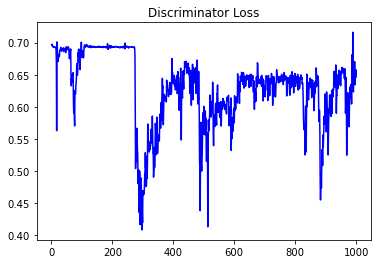

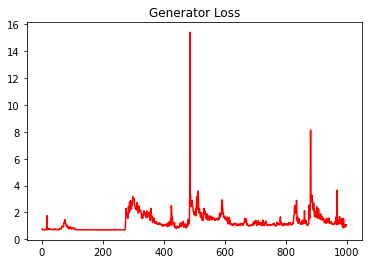

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.06189104323698716


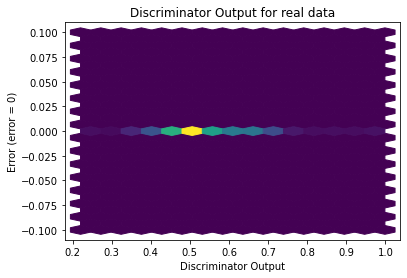

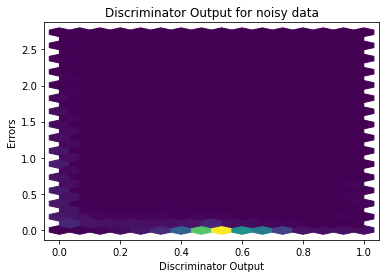

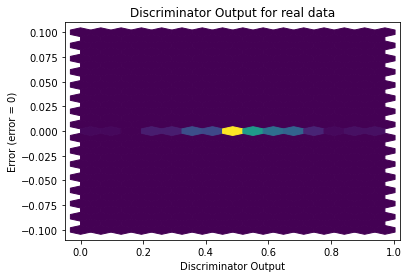

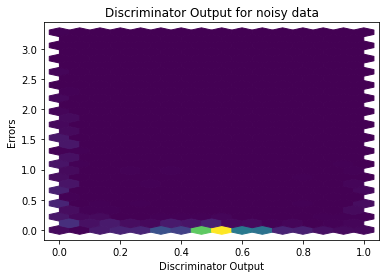

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

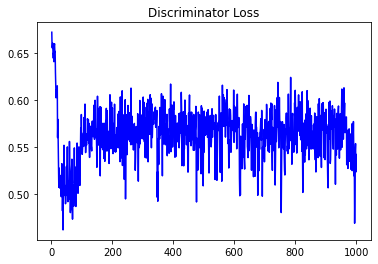

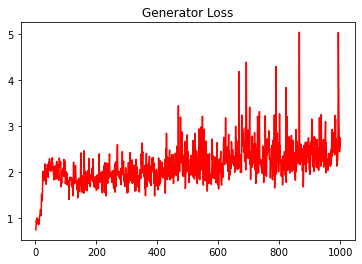

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.09035511745164147


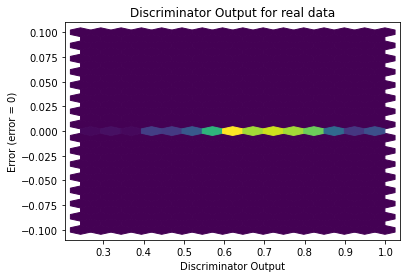

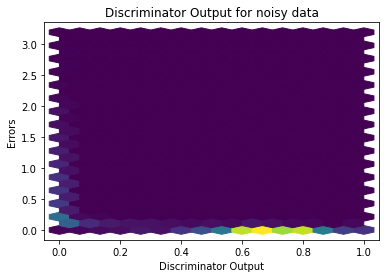

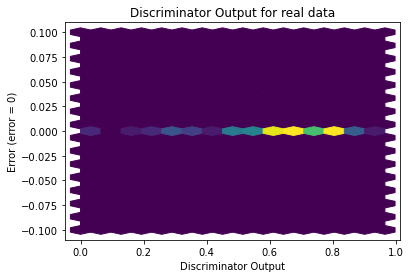

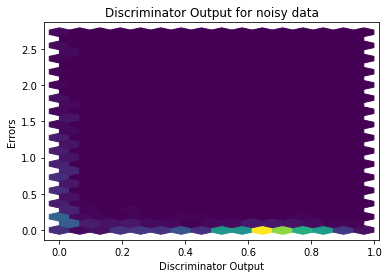

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


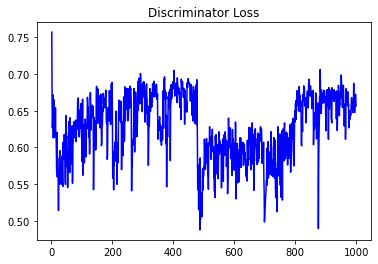

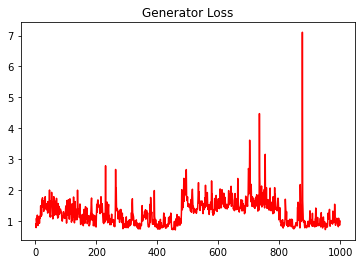

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.04993090228649316


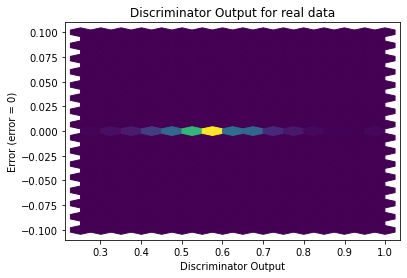

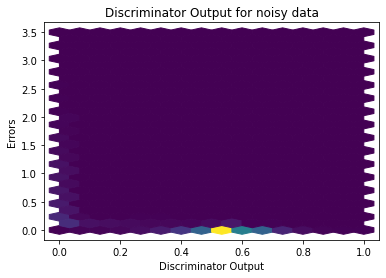

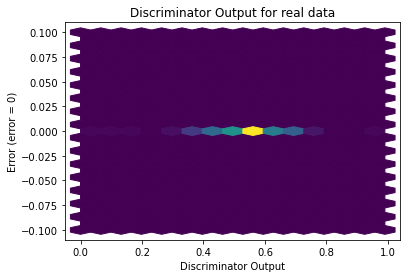

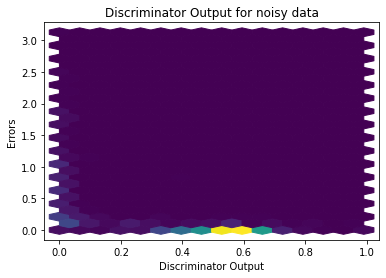

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


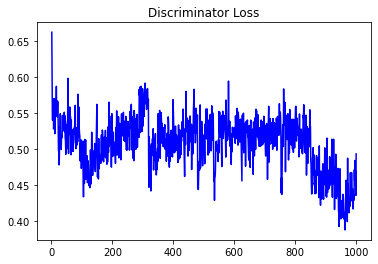

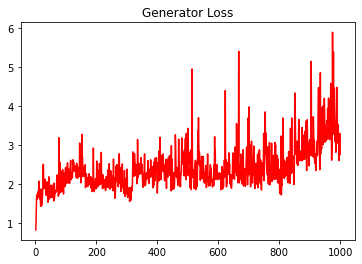

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.1203528323104339


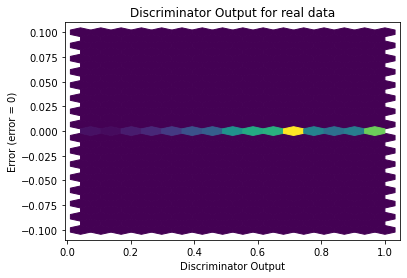

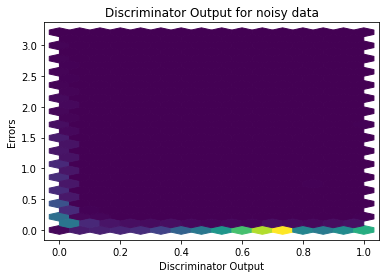

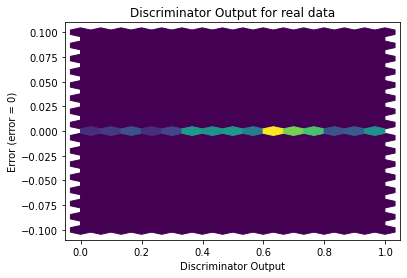

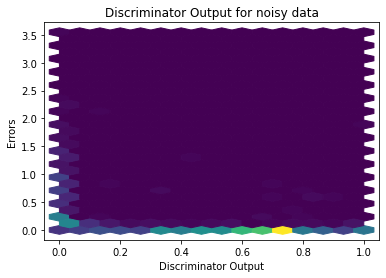

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9200]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9702]], requires_grad=True)
